Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [102]:
import numpy as np
import cv2
import glob
import math
import matplotlib.pyplot as plt
%matplotlib inline


In [103]:
# prepare object points, like 
# This makes numpy array of shape (48, 3), shape[0] = 48, shape[1] = 3
objp = np.zeros((6*8,3), np.float32)
print(objp.shape)

(48, 3)


In [105]:
# assign object points, giving proper indices like (0,0,0), (1,0,0), (2,0,0),...(0,1,0),(1,1,0),(2,1,0),...,(W-1,H-1,0)
# Break down this line: objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)
# numpy.mgrid is an available instance in numpy namespace, of class nd_grid
# "mgrid[0:8, 0:6]" creates a meshgrid has 8 in width and 6 in height, each cell in the mesh has a (i, j) value where 0<=i<width and 0<=j<height
# meshgrid[0] will contains all the column(for width) index, meshgrid[1] will contain all the row(for height) index
meshgrid = np.mgrid[0:8, 0:6]
# meshgrid.T is the transpose nd array of meshgrid
indices = meshgrid.T
# reshape(-1, 2) will transform the array to whatever shape to (X, 2), where X == element_count / 2, so the 
# overall element count matches(and they have to!)
indices_x_by_2 = indices.reshape(-1, 2)
# Syntatical sugar, objp[:,:2] == objp[0:48,0:2]
objp[:,:2] = indices_x_by_2


In [106]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('calibration_wide/GO*.jpg')


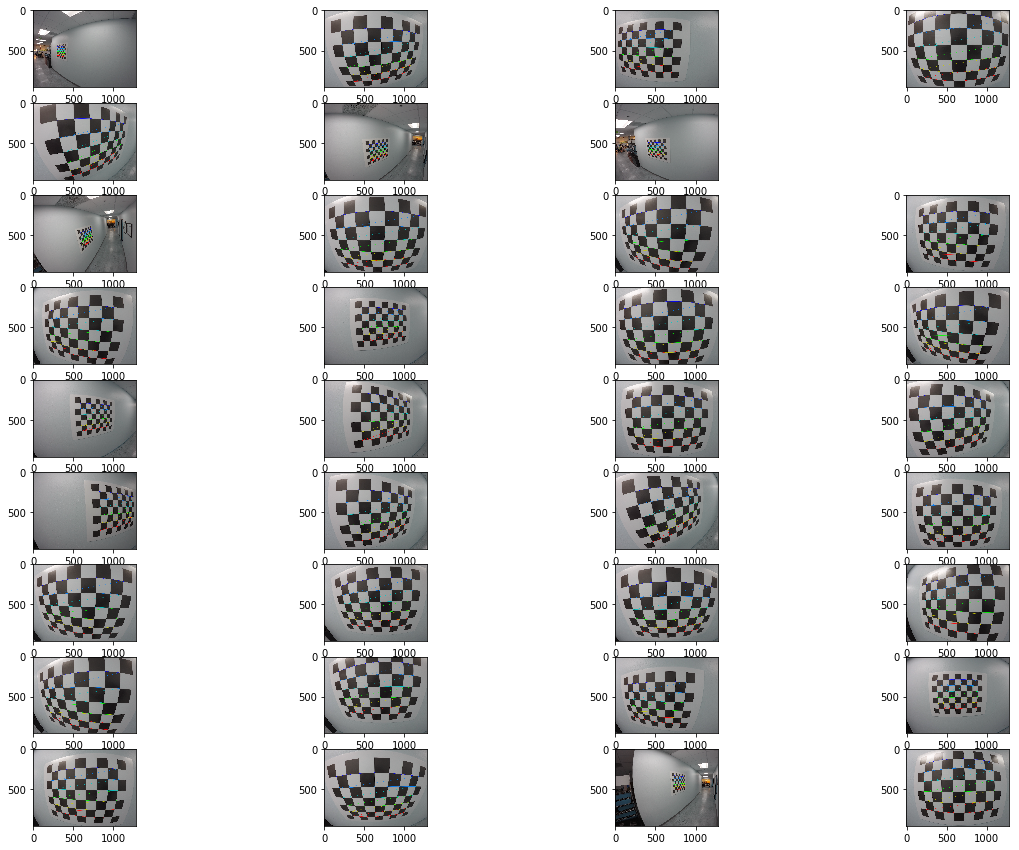

In [107]:

fig=plt.figure(figsize=(20, 15))
rows = math.ceil(len(images) / 4.0)
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        write_name = 'corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img)
        fig.add_subplot(rows, 4, idx+1)

        
        plt.imshow(img)


### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

In [108]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('calibration_wide/test_image.jpg')
img_dimension = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_dimension, None, None)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )


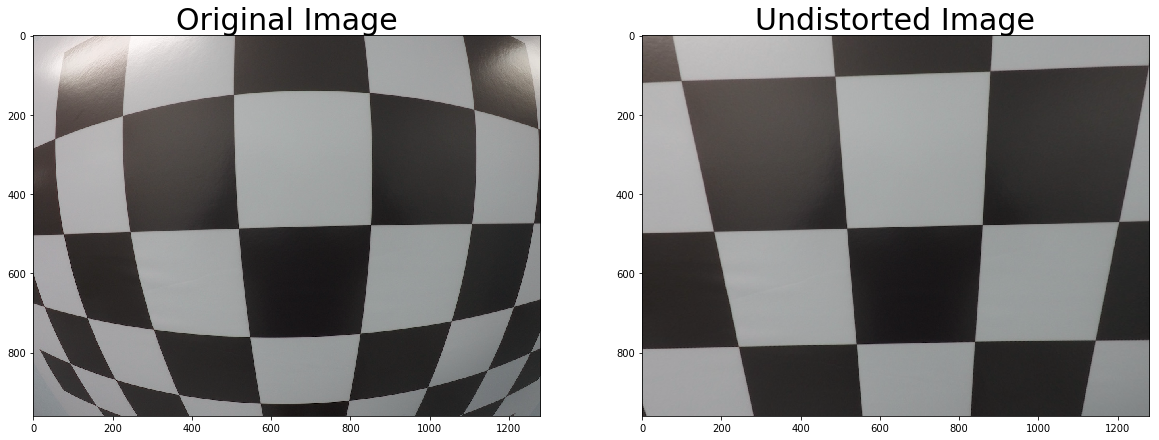

In [109]:

p = pickle.load( open("calibration_wide/wide_dist_pickle.p", "rb"))

dst = cv2.undistort(img, p['mtx'], p['dist'], None, None)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)


#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)